# Libraries

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Store Functions

In [31]:
'''
_____Functions for Data Cleaning_____
'''

# ___for all Columns___

# Drop Columns
def drop_columns(df):
    df = df.drop(columns=["Unnamed: 0"])
    return df

# Drop Duplicates
def drop_duplicates(df):
    df = df.drop_duplicates()
    return df

# ___each Column seperatly___

# Rename Column
def change_age_column(df):
    df = df.rename(columns={"Age": "age"})
    return df

# Rename Column
def change_sex_column(df):
    df = df.rename(columns={"Sex": "sex"})
    return df

# Rename Column
def change_job_column(df):
    df = df.rename(columns={"Job": "job"})
    return df

# Rename Column and replace " " with "_"
def change_housing_column(df):
    df = df.rename(columns={"Housing": "housing"})
    df['housing'] = df['housing'].str.replace(" ", "_")
    return df

# Rename Column # Rename Column and replace " " with "_"
def change_saving_accounts_column(df):
    df = df.rename(columns={"Saving accounts": "saving_accounts"})
    df['saving_accounts'] = df['saving_accounts'].str.replace(" ", "_")
    df = df.dropna(subset=['saving_accounts'])
    return df

# Rename Column and replace " " with "_"
def change_checking_account_column(df):
    df = df.rename(columns={"Checking account": "checking_account"})
    df['checking_account'] = df['checking_account'].str.replace(" ", "_")
    df = df.dropna(subset=['checking_account'])
    return df

def change_credit_amount_column(df):
    df = df.rename(columns={"Credit amount": "credit_amount"})
    mean_credit_amount = df['credit_amount'].mean()
    mean_credit_amount_rounded = int(mean_credit_amount)
    df['credit_amount'] = df['credit_amount'].fillna(mean_credit_amount)
    return df

# Rename Column
def change_duration_column(df):
    df = df.rename(columns={"Duration": "duration"})
    return df

# Rename Column and replace " " with "_"
def change_purpose_column(df):
    df = df.rename(columns={"Purpose": "purpose"})
    df['purpose'] = df['purpose'].str.lower()
    df['purpose'] = df['purpose'].str.replace(" ", "_")
    return df

# Rename Column
def change_risk_column(df):
    df = df.rename(columns={"Risk": "risk"})
    return df


'''
_____Functions for Data Cleaning for Machine Learing_____
'''

# Function to transform sex column
def transform_sex(df):
    df['sex_male'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)
    df['sex_female'] = df['sex'].apply(lambda x: 1 if x == 'female' else 0)

# Function to transform housing column
def transform_housing(df):
    df['housing_own'] = df['housing'].apply(lambda x: 1 if x == 'own' else 0)
    df['housing_free'] = df['housing'].apply(lambda x: 1 if x == 'free' else 0)
    df['housing_rent'] = df['housing'].apply(lambda x: 1 if x == 'rent' else 0)

# Function to transform saving_accounts column
def transform_saving_accounts(df):
    saving_map = {'little': 0, 'moderate': 1, 'quite_rich': 2, 'rich': 3}
    df['saving_accounts'] = df['saving_accounts'].map(saving_map)

# Function to transform checking_account column
def transform_checking_account(df):
    checking_map = {'moderate': 0, 'little': 1, 'rich': 2}
    df['checking_account'] = df['checking_account'].map(checking_map)

# Function to transform purpose column into seperate columns
def transform_purpose(df):
    df['purpose_radio/tv'] = df['purpose'].apply(lambda x: 1 if x == 'radio/tv' else 0)
    df['purpose_furniture/equipment'] = df['purpose'].apply(lambda x: 1 if x == 'furniture/equipment' else 0)
    df['purpose_car'] = df['purpose'].apply(lambda x: 1 if x == 'car' else 0)
    df['purpose_business'] = df['purpose'].apply(lambda x: 1 if x == 'business' else 0)
    df['purpose_domestic_appliances'] = df['purpose'].apply(lambda x: 1 if x == 'domestic_appliance' else 0)
    df['purpose_repairs'] = df['purpose'].apply(lambda x: 1 if x == 'repairs' else 0)
    df['purpose_vacation/others'] = df['purpose'].apply(lambda x: 1 if x == 'vacation/others' else 0)
    df['purpose_education'] = df['purpose'].apply(lambda x: 1 if x == 'education' else 0)

# Function to transform the entire dataframe and add risk column back and move to end
def transform_dataframe(df):
    transform_sex(df)
    transform_housing(df)
    #transform_saving_accounts(df)
    #transform_checking_account(df)
    transform_purpose(df)
    # Adding the 'risk' column back
    df['risk'] = df['risk'].apply(lambda x: 1 if x == 'good' else 0)  # Assuming 'good' = 1, 'bad' = 0
    # Move risk column to end
    cols = df.columns.tolist()
    cols.remove('risk')  # Remove risk column temporarily
    cols.append('risk')  # Append risk column at the end
    df = df[cols]  # Reorder columns with risk at the end
    
'''
_____Functions Checking Dataset_____
'''

def Dataset_Information(df):
    
    def print_yellow_and_bold(text):
        print("\033[1m\033[93m" + text + "\033[0m")
    
    # Display the entire DataFrame
    display(df)
    
    # Display column names in yellow
    print_yellow_and_bold("Column names:")
    display(df.columns)

    # Display shape of the DataFrame in yellow
    print_yellow_and_bold("\nShape of the DataFrame:")
    display(df.shape)

    # Display info of the DataFrame in yellow
    print_yellow_and_bold("\nInfo of the DataFrame:")
    display(df.info())
    
    # Display data types of each column in yellow
    print_yellow_and_bold("\nData types of each column:")
    display(df.dtypes)

    # Check for null values in each column in yellow
    print_yellow_and_bold("\nCheck for null values in each column:")
    display(df.isna().any())

    # Checking for Null Values (Returns a DataFrame with True where values are null) in yellow
    print_yellow_and_bold("\nDataFrame with True where values are null:")
    display(df.isnull())

    # Count the number of null values in each column in yellow
    print_yellow_and_bold("\nCount of null values in each column:")
    display(df.isna().sum())


'''
_____Functions for Initial Exploration / Univariate Analysis_____
'''
def Initial_Exploration(df):
    
    def print_yellow_and_bold(text):
        print("\033[1m\033[93m" + text + "\033[0m")
    
    # Extracting column names with numerical data types
    print_yellow_and_bold("Column names with numerical data types:")
    display(", ".join(df.select_dtypes("number").columns.tolist()))
    
    # Check for null values in each column in yellow
    print_yellow_and_bold("\nCheck for null values in each column:")
    display(df.isna().any())

    # Checking for Null Values (Returns a DataFrame with True where values are null) in yellow
    print_yellow_and_bold("\nDataFrame with True where values are null:")
    display(df.isnull())

    # Count the number of null values in each column in yellow
    print_yellow_and_bold("\nCount of null values in each column:")
    display(df.isna().sum())    
    
    # Counting and sorting unique values for each numerical column in descending order
    print_yellow_and_bold("\nNumber of unique values for each numerical column (descending order):")
    display(df.select_dtypes("number").nunique().sort_values(ascending=False))
    
    # Display unique values for each column in yellow
    print_yellow_and_bold("\nUnique values for each column:")
    for col in df.columns:
        unique_values = df[col].unique()
        print_yellow_and_bold(f"\n{col}:")
        display(unique_values)
    
    # Extracting column names with object (string) data types
    print_yellow_and_bold("\nColumn names with object data types:")
    display(", ".join(df.select_dtypes("object").columns.tolist()))
    
    # Counting and sorting unique values for each object column in descending order
    print_yellow_and_bold("\nNumber of unique values for each object column (descending order):")
    display(df.select_dtypes("object").nunique().sort_values(ascending=False))
    
    # Extracting columns with object data types to create a categorical dataframe
    df_categorical = df.select_dtypes("object")
    df_numerical = df.select_dtypes("number")
    
    # Verify that the total number of columns matches the sum of object and numerical columns
    print_yellow_and_bold("\nVerification of total columns:")
    total_columns_correct = len(df.columns) == len(df_categorical.columns) + len(df_numerical.columns)
    print(f"Total columns match expectation: {total_columns_correct}")
    
    
'''
_____Functions for Bivariate Analysis_____
'''




'''
_____Funtions for Mutivariate Analysis_____
'''



'''
_____other Functions_____
'''

# print in yellow and bold
def print_yellow_and_bold(text):
    bold_text = "\033[93;1m" + text + "\033[0m"
    print(bold_text)

In [32]:
# Display all Columns
pd.set_option('display.max_columns', None)

# Import Datasets

In [34]:
url = "/Users/toan/Arbeit/Ironhack/Miniproject/week7/raw/german_credit_risk.csv"

# Dataset

In [36]:
df = pd.read_csv(url, delimiter=',')
display(df.head(30))

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


# Checking Dataset

In [38]:
# Example usage:
# Assuming 'df' is your pandas DataFrame
Dataset_Information(df)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


Column names:


Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')


Shape of the DataFrame:


(1000, 11)


Info of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


None


Data types of each column:


Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object


Check for null values in each column:


Unnamed: 0          False
Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts      True
Checking account     True
Credit amount       False
Duration            False
Purpose             False
Risk                False
dtype: bool


DataFrame with True where values are null:


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,True,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,True,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False



Count of null values in each column:


Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [39]:
df = df.drop(columns=['Saving accounts', 'Checking account'])

# Data Cleaning

## Apply Cleaning Functions

In [42]:
#Apply Data Cleaning functions
df = drop_columns(df)
df = change_age_column(df)
df = change_sex_column(df)
df = change_job_column(df)
df = change_housing_column(df)
#df = change_saving_accounts_column(df)
#df = change_checking_account_column(df)
df = change_credit_amount_column(df)
df = change_duration_column(df)
df = change_purpose_column(df)
df = change_risk_column(df)

# Univariate Analysis

In [44]:
display(df)

,age,sex,job,housing,credit_amount,duration,purpose,risk
0,67,male,2,own,1169,6,radio/tv,good
1,22,female,2,own,5951,48,radio/tv,bad
2,49,male,1,own,2096,12,education,good
3,45,male,2,free,7882,42,furniture/equipment,good
4,53,male,2,free,4870,24,car,bad
...,...,...,...,...,...,...,...,...
995,31,female,1,own,1736,12,furniture/equipment,good
996,40,male,3,own,3857,30,car,good
997,38,male,2,own,804,12,radio/tv,good
998,23,male,2,free,1845,45,radio/tv,bad


## Initial Exploration

In [46]:
# Assuming 'df' is your pandas DataFrame
Initial_Exploration(df)

Column names with numerical data types:


'age, job, credit_amount, duration'


Check for null values in each column:


age              False
sex              False
job              False
housing          False
credit_amount    False
duration         False
purpose          False
risk             False
dtype: bool


DataFrame with True where values are null:


,age,sex,job,housing,credit_amount,duration,purpose,risk
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False



Count of null values in each column:


age              0
sex              0
job              0
housing          0
credit_amount    0
duration         0
purpose          0
risk             0
dtype: int64


Number of unique values for each numerical column (descending order):


credit_amount    921
age               53
duration          33
job                4
dtype: int64


Unique values for each column:

age:


array([67, 22, 49, 45, 53, 35, 61, 28, 25, 24, 60, 32, 44, 31, 48, 26, 36,
       39, 42, 34, 63, 27, 30, 57, 33, 37, 58, 23, 29, 52, 50, 46, 51, 41,
       40, 66, 47, 56, 54, 20, 21, 38, 70, 65, 74, 68, 43, 55, 64, 75, 19,
       62, 59])


sex:


array(['male', 'female'], dtype=object)


job:


array([2, 1, 3, 0])


housing:


array(['own', 'free', 'rent'], dtype=object)


credit_amount:


array([ 1169,  5951,  2096,  7882,  4870,  9055,  2835,  6948,  3059,
        5234,  1295,  4308,  1567,  1199,  1403,  1282,  2424,  8072,
       12579,  3430,  2134,  2647,  2241,  1804,  2069,  1374,   426,
         409,  2415,  6836,  1913,  4020,  5866,  1264,  1474,  4746,
        6110,  2100,  1225,   458,  2333,  1158,  6204,  6187,  6143,
        1393,  2299,  1352,  7228,  2073,  5965,  1262,  3378,  2225,
         783,  6468,  9566,  1961,  6229,  1391,  1537,  1953, 14421,
        3181,  5190,  2171,  1007,  1819,  2394,  8133,   730,  1164,
        5954,  1977,  1526,  3965,  4771,  9436,  3832,  5943,  1213,
        1568,  1755,  2315,  1412, 12612,  2249,  1108,   618,  1409,
         797,  3617,  1318, 15945,  2012,  2622,  2337,  7057,  1469,
        2323,   932,  1919,  2445, 11938,  6458,  6078,  7721,  1410,
        1449,   392,  6260,  7855,  1680,  3578,  7174,  2132,  4281,
        2366,  1835,  3868,  1768,   781,  1924,  2121,   701,   639,
        1860,  3499,


duration:


array([ 6, 48, 12, 42, 24, 36, 30, 15,  9, 10,  7, 60, 18, 45, 11, 27,  8,
       54, 20, 14, 33, 21, 16,  4, 47, 13, 22, 39, 28,  5, 26, 72, 40])


purpose:


array(['radio/tv', 'education', 'furniture/equipment', 'car', 'business',
       'domestic_appliances', 'repairs', 'vacation/others'], dtype=object)


risk:


array(['good', 'bad'], dtype=object)


Column names with object data types:


'sex, housing, purpose, risk'


Number of unique values for each object column (descending order):


purpose    8
housing    3
sex        2
risk       2
dtype: int64


Verification of total columns:
Total columns match expectation: True


## Analysis

In [48]:
# Extracting columns with object data types to create a categorical dataframe
df_categorical = df.select_dtypes("object")
df_numerical = df.select_dtypes("number")

## Categorical Variables

In [50]:
display(df_categorical)

,sex,housing,purpose,risk
0,male,own,radio/tv,good
1,female,own,radio/tv,bad
2,male,own,education,good
3,male,free,furniture/equipment,good
4,male,free,car,bad
...,...,...,...,...
995,female,own,furniture/equipment,good
996,male,own,car,good
997,male,own,radio/tv,good
998,male,free,radio/tv,bad



Columnname: sex
Frequency table for 'sex':
sex
male      690
female    310
Name: count, dtype: int64

Proportion table for 'sex':
sex
male      0.69
female    0.31
Name: proportion, dtype: float64


/var/folders/gb/smcfnkts5d5945c5v7zrw_p00000gn/T/ipykernel_36967/4205516445.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bar_data, x='Category', y='Frequency', palette="tab10")


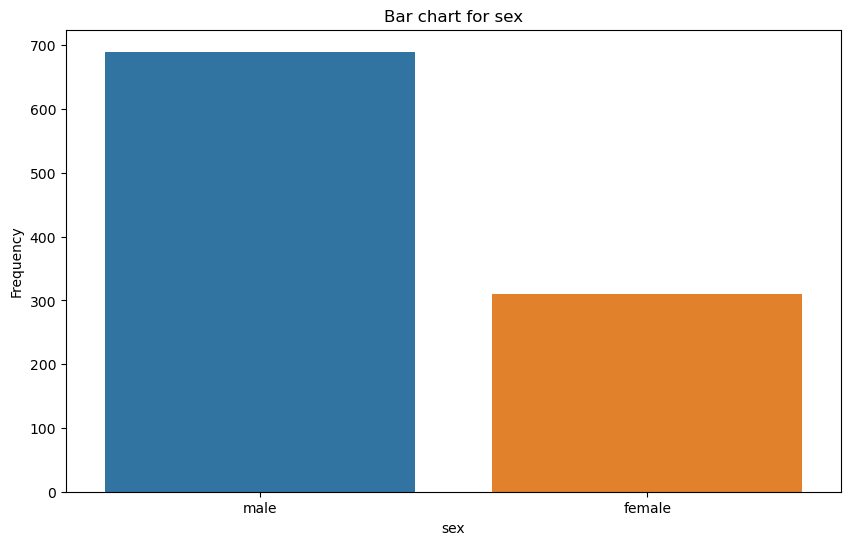

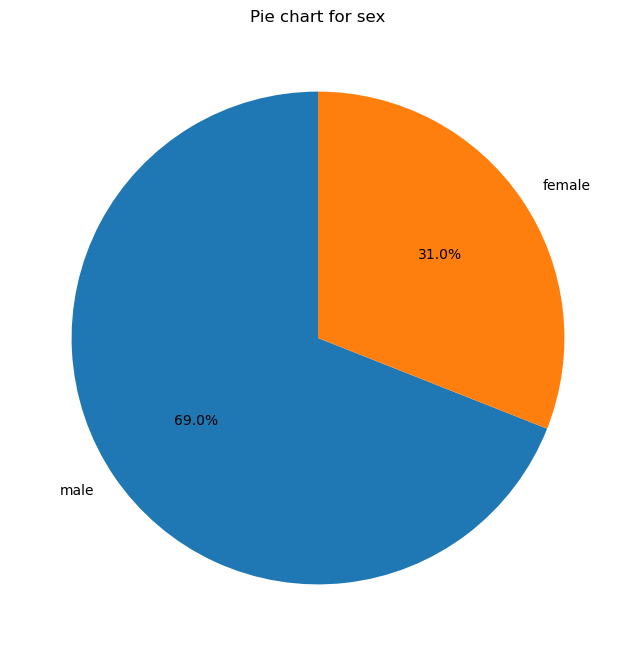

Columnname: housing
Frequency table for 'housing':
housing
own     713
rent    179
free    108
Name: count, dtype: int64

Proportion table for 'housing':
housing
own     0.713
rent    0.179
free    0.108
Name: proportion, dtype: float64


/var/folders/gb/smcfnkts5d5945c5v7zrw_p00000gn/T/ipykernel_36967/4205516445.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bar_data, x='Category', y='Frequency', palette="tab10")


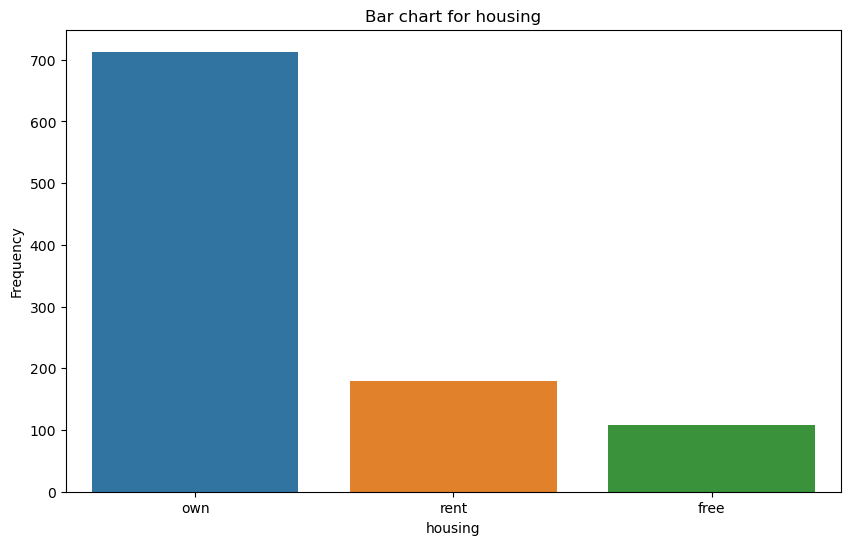

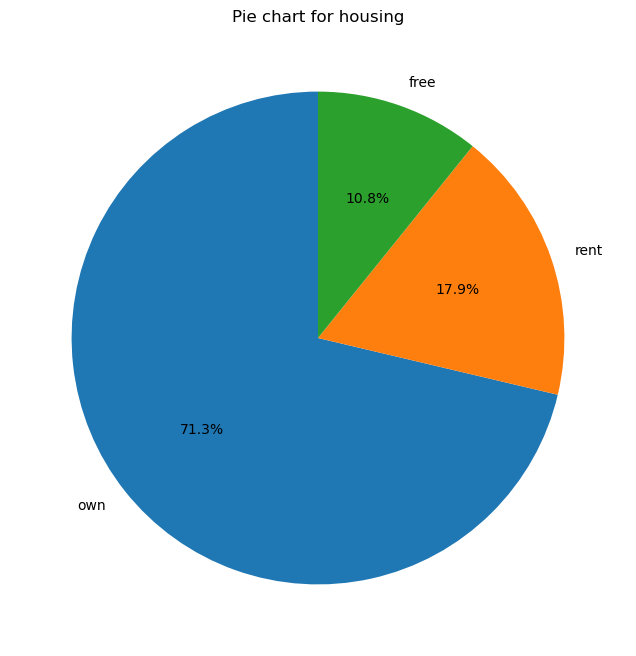

Columnname: purpose
Frequency table for 'purpose':
purpose
car                    337
radio/tv               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic_appliances     12
vacation/others         12
Name: count, dtype: int64

Proportion table for 'purpose':
purpose
car                    0.337
radio/tv               0.280
furniture/equipment    0.181
business               0.097
education              0.059
repairs                0.022
domestic_appliances    0.012
vacation/others        0.012
Name: proportion, dtype: float64


/var/folders/gb/smcfnkts5d5945c5v7zrw_p00000gn/T/ipykernel_36967/4205516445.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bar_data, x='Category', y='Frequency', palette="tab10")


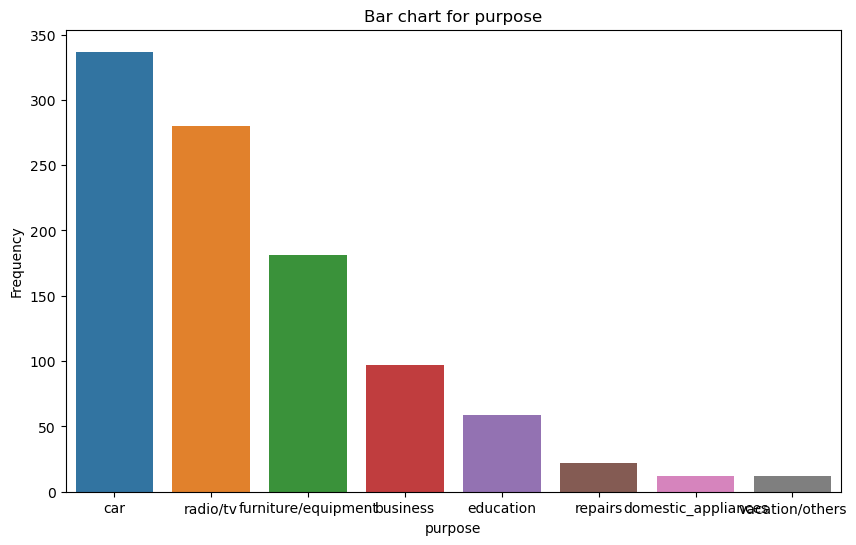

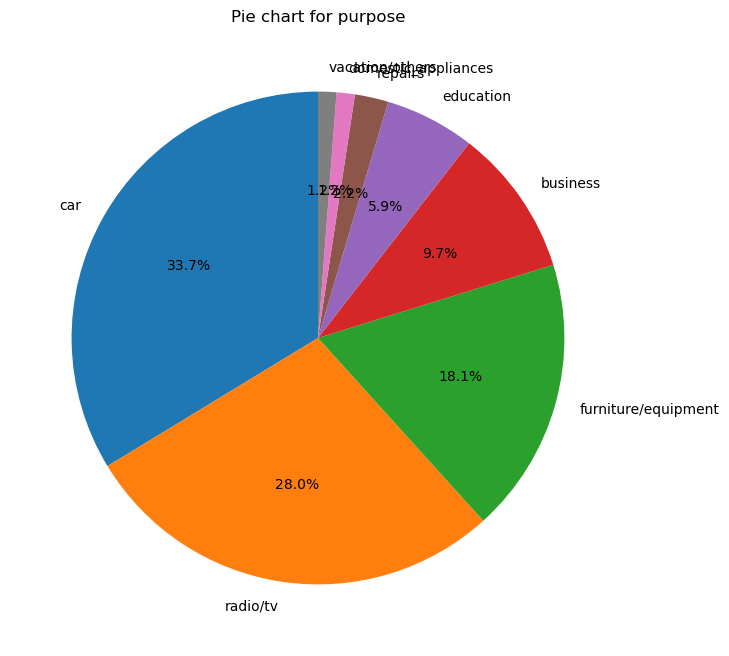

Columnname: risk
Frequency table for 'risk':
risk
good    700
bad     300
Name: count, dtype: int64

Proportion table for 'risk':
risk
good    0.7
bad     0.3
Name: proportion, dtype: float64


/var/folders/gb/smcfnkts5d5945c5v7zrw_p00000gn/T/ipykernel_36967/4205516445.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bar_data, x='Category', y='Frequency', palette="tab10")


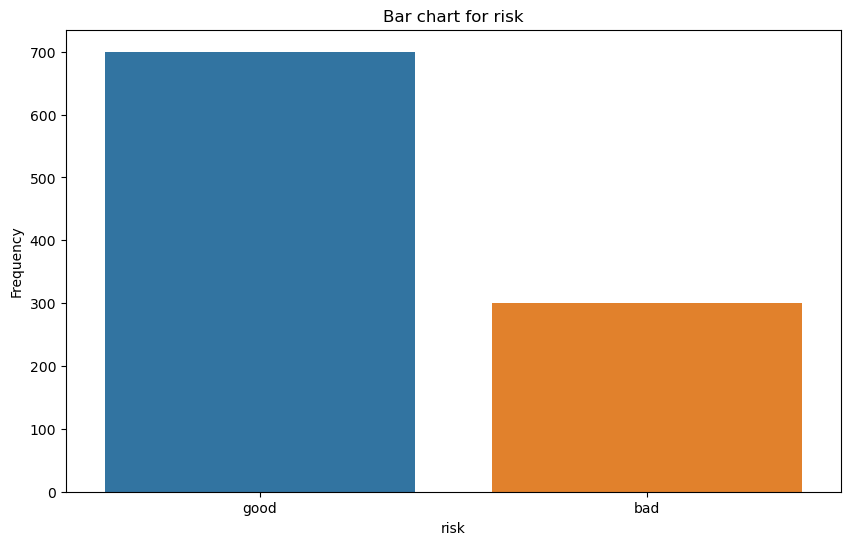

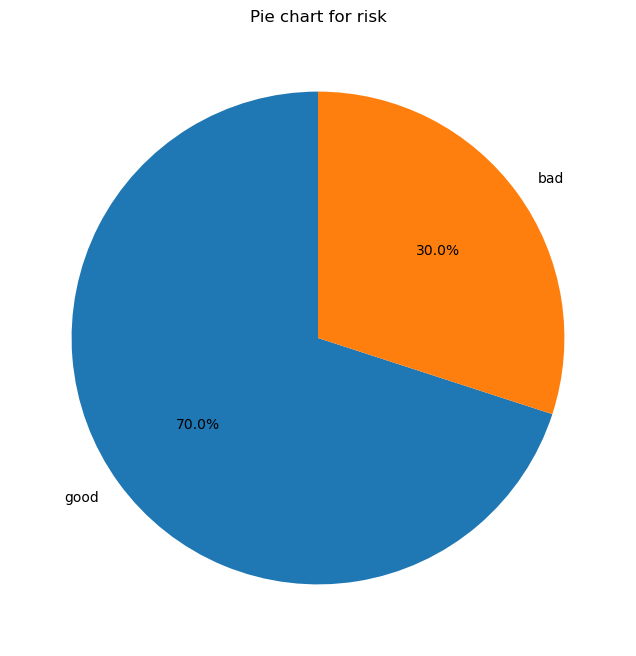

In [51]:
print()
# Iterate over all columns in the dataframe
for column in df_categorical.columns:
    print_yellow_and_bold(f"Columnname: {column}")
    
    # Frequency table for the column
    frequency_table = df_categorical[column].value_counts()
    
    # Calculating the proportion of each unique value in the column
    proportion_table = df_categorical[column].value_counts(normalize=True)
    
    # Printing frequency and proportion tables
    print("Frequency table for '{}':".format(column))
    print(frequency_table)
    print("\nProportion table for '{}':".format(column))
    print(proportion_table)
    
    # Create a DataFrame for the bar plot
    bar_data = pd.DataFrame({
        'Category': frequency_table.index,
        'Frequency': frequency_table.values
    })
    
    # Plotting a bar chart using the values from the frequency table
    plt.figure(figsize=(10, 6))
    sns.barplot(data=bar_data, x='Category', y='Frequency', palette="tab10")
    plt.title(f'Bar chart for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
    # Plotting a pie chart using the values from the frequency table
    plt.figure(figsize=(8, 8))
    frequency_table.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("tab10"))
    plt.title(f'Pie chart for {column}')
    plt.ylabel('')  # Hide the y-label for better aesthetics
    plt.show()

## Numerical Variables

,age,job,credit_amount,duration
0,67,2,1169,6
1,22,2,5951,48
2,49,1,2096,12
3,45,2,7882,42
4,53,2,4870,24
...,...,...,...,...
995,31,1,1736,12
996,40,3,3857,30
997,38,2,804,12
998,23,2,1845,45



Columnname: age

Summary statistics for 'age':
count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64

Measures of Centrality for 'age':
Mean: 35.546
Median: 33.0
Mode: 27

Measures of Dispersion for 'age':
Variance: 129.40128528528504
Standard Deviation: 11.375468574317502
Minimum: 19
Maximum: 75
Range: 56
Quantiles: 
0.25    27.0
0.50    33.0
0.75    42.0
Name: age, dtype: float64

Shape of the Distribution for 'age':
Skewness: 1.0207392686768317
Kurtosis: 0.5957795670766881


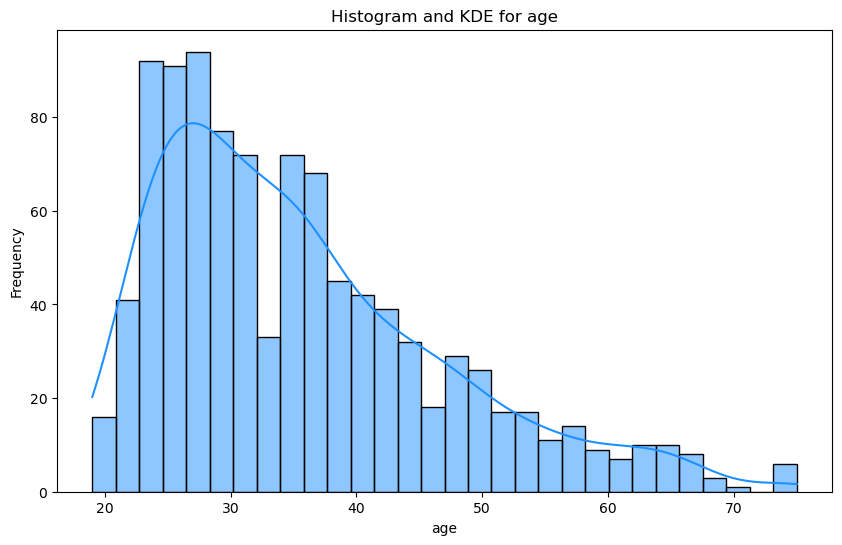

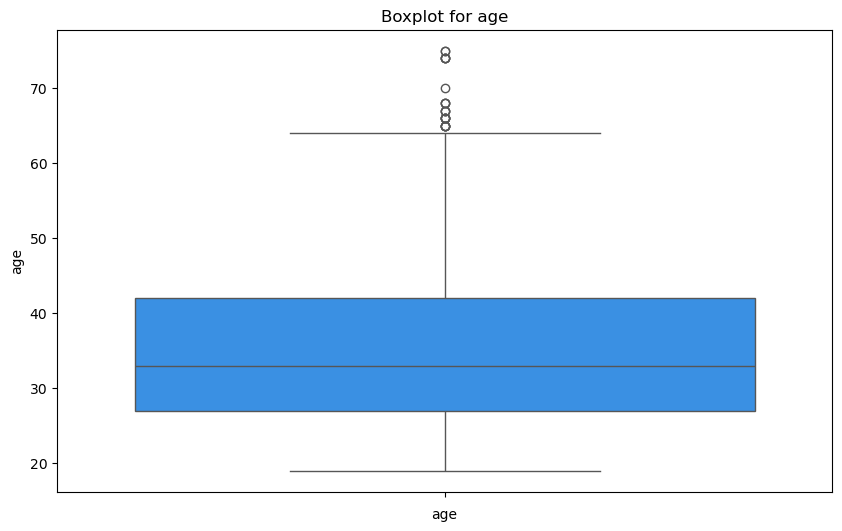

Columnname: job

Summary statistics for 'job':
count    1000.000000
mean        1.904000
std         0.653614
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: job, dtype: float64

Measures of Centrality for 'job':
Mean: 1.904
Median: 2.0
Mode: 2

Measures of Dispersion for 'job':
Variance: 0.4272112112112049
Standard Deviation: 0.653613961915751
Minimum: 0
Maximum: 3
Range: 3
Quantiles: 
0.25    2.0
0.50    2.0
0.75    2.0
Name: job, dtype: float64

Shape of the Distribution for 'job':
Skewness: -0.3742948595135131
Kurtosis: 0.5018909846797865


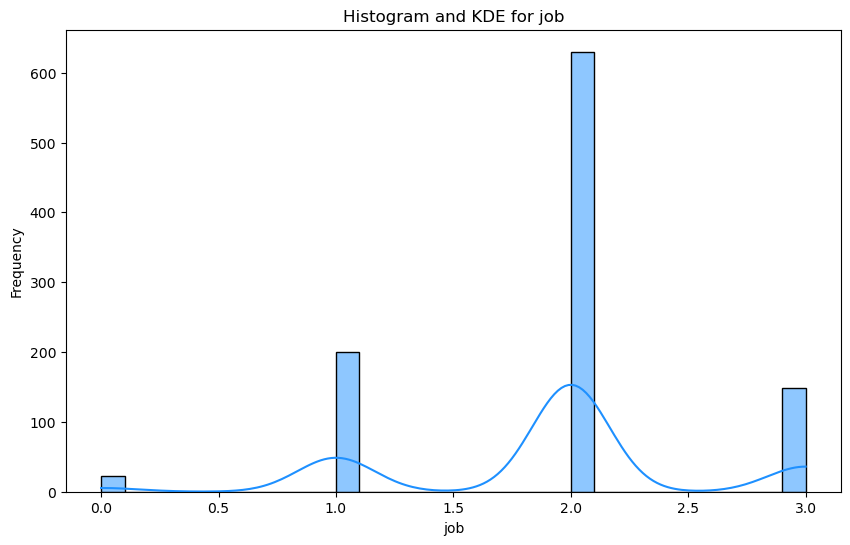

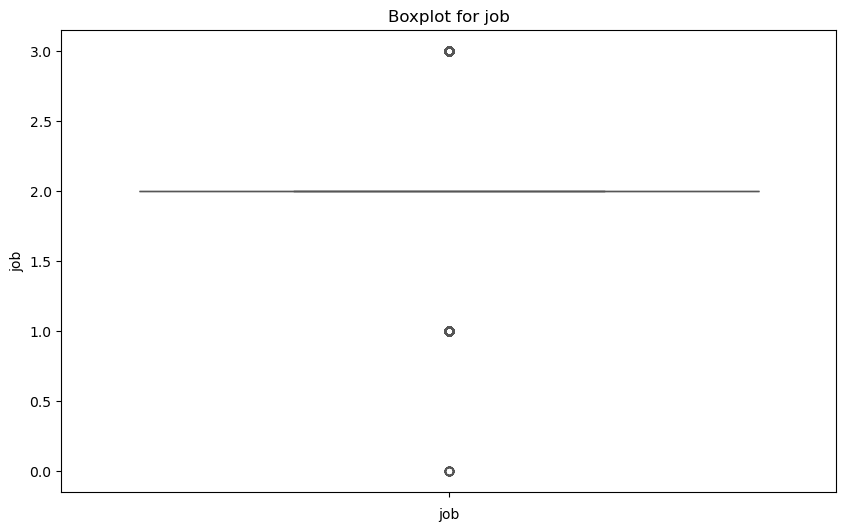

Columnname: credit_amount

Summary statistics for 'credit_amount':
count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: credit_amount, dtype: float64

Measures of Centrality for 'credit_amount':
Mean: 3271.258
Median: 2319.5
Mode: 1258

Measures of Dispersion for 'credit_amount':
Variance: 7967843.470906905
Standard Deviation: 2822.73687596044
Minimum: 250
Maximum: 18424
Range: 18174
Quantiles: 
0.25    1365.50
0.50    2319.50
0.75    3972.25
Name: credit_amount, dtype: float64

Shape of the Distribution for 'credit_amount':
Skewness: 1.9496276798326209
Kurtosis: 4.29259030804851


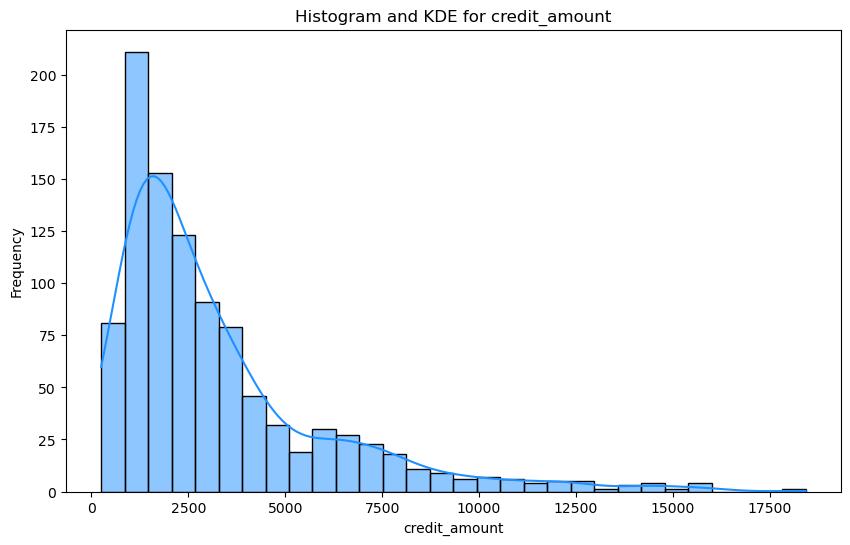

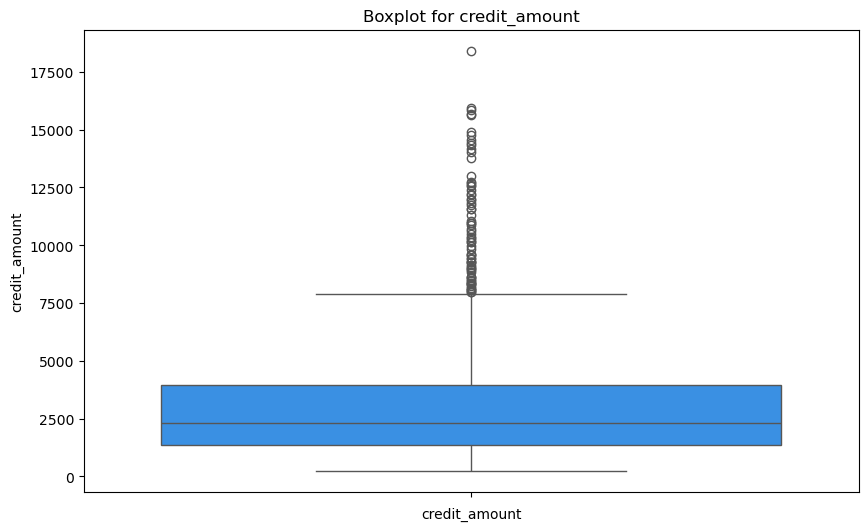

Columnname: duration

Summary statistics for 'duration':
count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: duration, dtype: float64

Measures of Centrality for 'duration':
Mean: 20.903
Median: 18.0
Mode: 24

Measures of Dispersion for 'duration':
Variance: 145.41500600600645
Standard Deviation: 12.058814452756392
Minimum: 4
Maximum: 72
Range: 68
Quantiles: 
0.25    12.0
0.50    18.0
0.75    24.0
Name: duration, dtype: float64

Shape of the Distribution for 'duration':
Skewness: 1.0941841715555418
Kurtosis: 0.9197813600546372


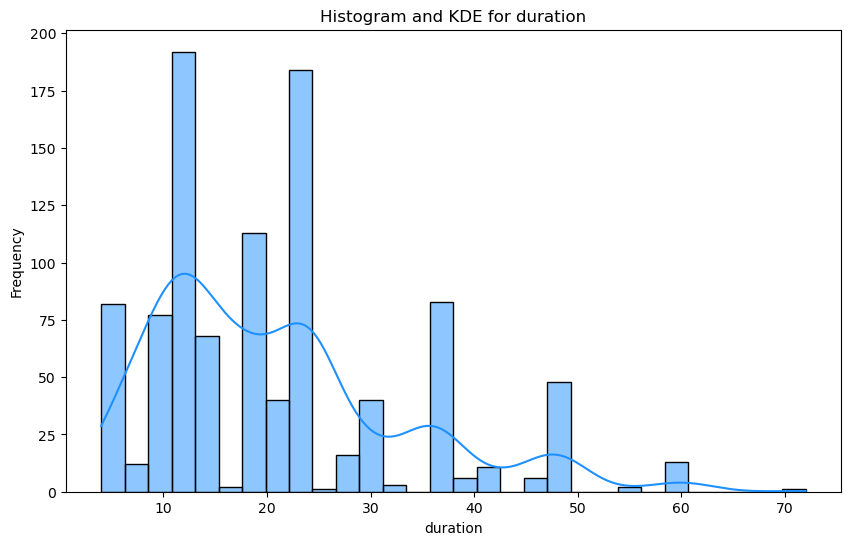

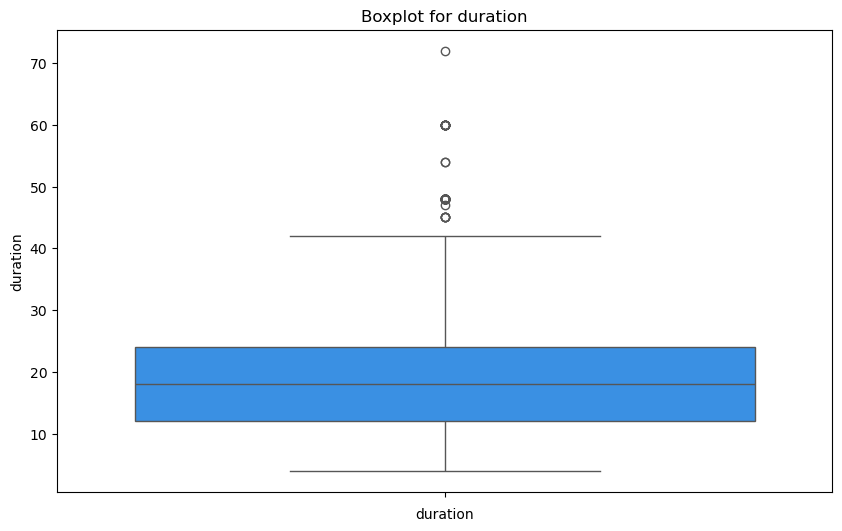

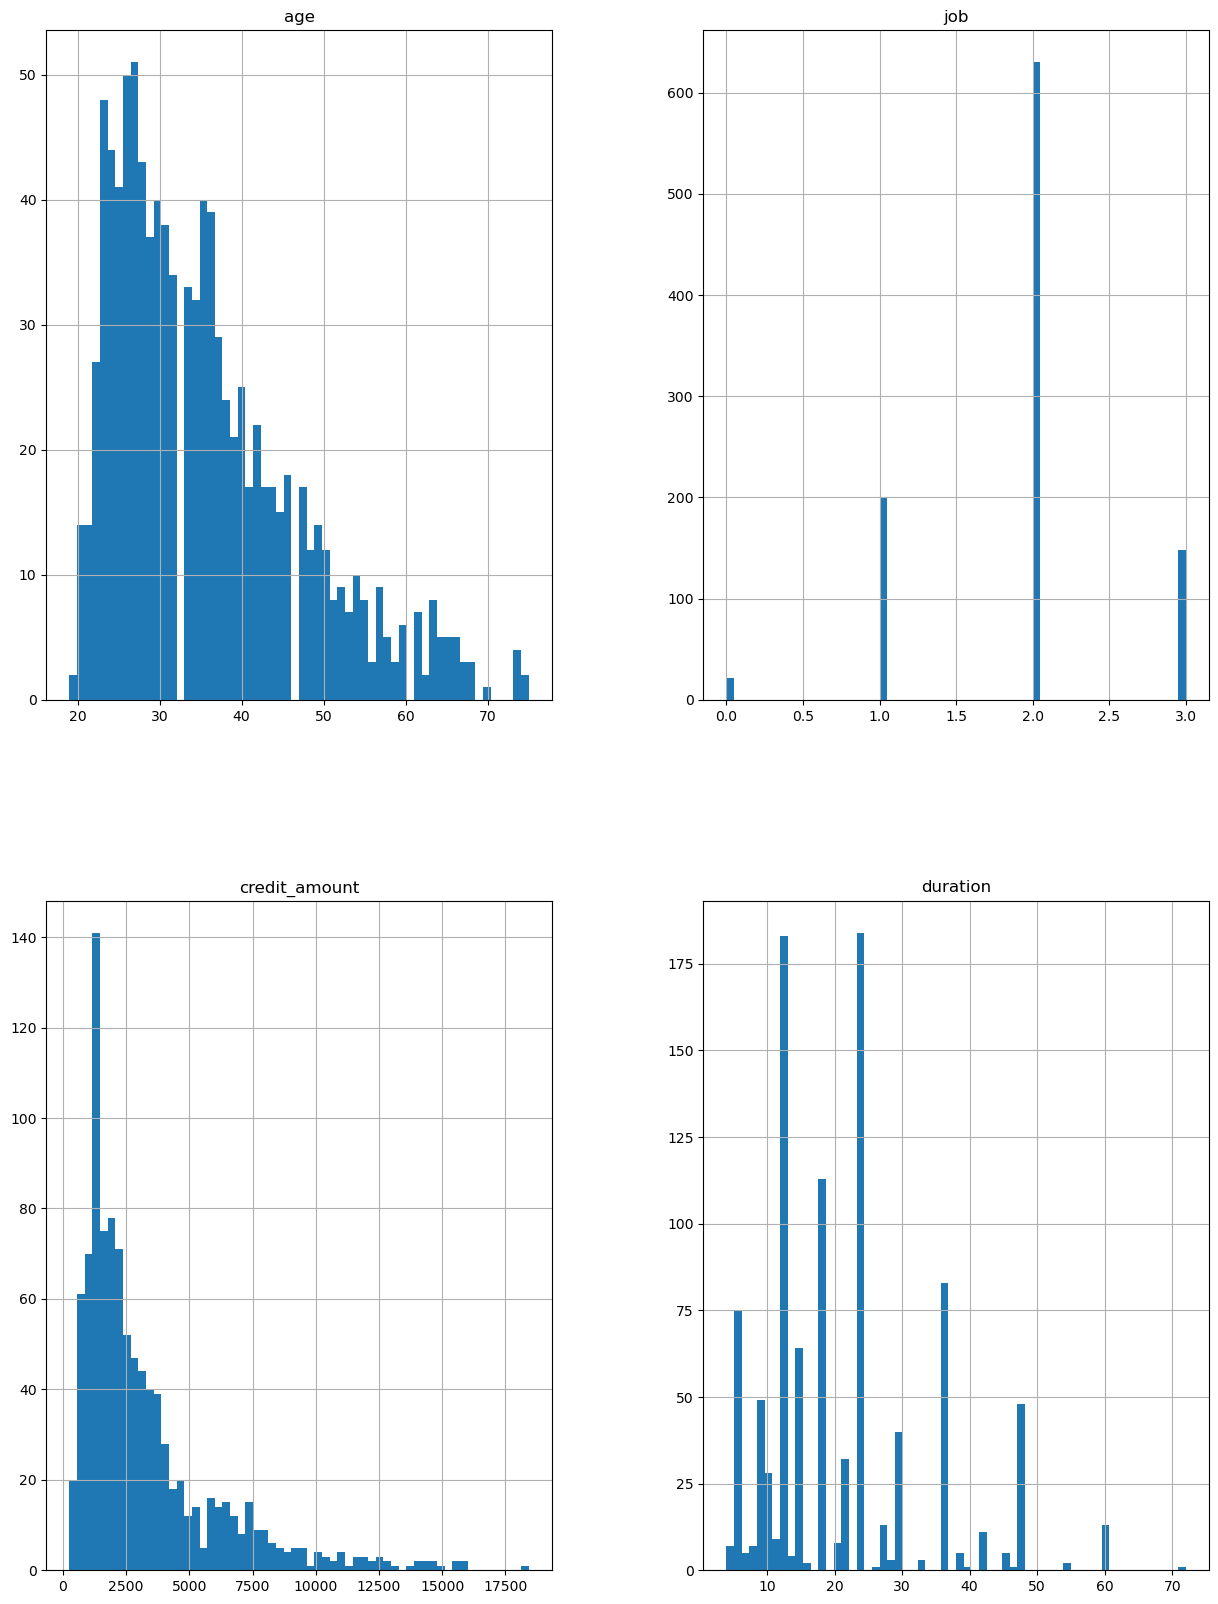

In [53]:
print()

display(df_numerical)
print()

# Iterate over all columns in the dataframe
for column in df_numerical.columns:
    print_yellow_and_bold(f"Columnname: {column}")
    
    print()
    
    # Summary statistics for the column
    print("Summary statistics for '{}':".format(column))
    print(df_numerical[column].describe())
    
    # Measures of Centrality
    mean_value = df_numerical[column].mean()
    median_value = df_numerical[column].median()
    mode_value = df_numerical[column].mode()[0]
    
    print("\nMeasures of Centrality for '{}':".format(column))
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Mode: {mode_value}")
    
    # Measures of Dispersion
    variance_value = df_numerical[column].var()
    std_dev_value = df_numerical[column].std()
    min_value = df_numerical[column].min()
    max_value = df_numerical[column].max()
    range_value = max_value - min_value
    quantiles_value = df_numerical[column].quantile([0.25, 0.5, 0.75])
    
    print("\nMeasures of Dispersion for '{}':".format(column))
    print(f"Variance: {variance_value}")
    print(f"Standard Deviation: {std_dev_value}")
    print(f"Minimum: {min_value}")
    print(f"Maximum: {max_value}")
    print(f"Range: {range_value}")
    print(f"Quantiles: \n{quantiles_value}")
    
    # Shape of the Distribution
    skewness_value = df_numerical[column].skew()
    kurtosis_value = df_numerical[column].kurtosis()
    
    print("\nShape of the Distribution for '{}':".format(column))
    print(f"Skewness: {skewness_value}")
    print(f"Kurtosis: {kurtosis_value}")
    
    # Plotting a histogram with KDE
    plt.figure(figsize=(10, 6))
    sns.histplot(df_numerical[column], kde=True, bins=30, color="dodgerblue")
    plt.title(f'Histogram and KDE for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
    # Plotting a boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_numerical[column], color="dodgerblue")
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.show()

print()

# Creating histograms for each numerical column in 'df_numerical'
df_numerical.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

## Anaylsis for Good and Bad 

In [55]:
# Separate data based on 'risk' column
df_good = df[df['risk'] == 'good']
df_bad = df[df['risk'] == 'bad']

# Bivariate Analysis

In [57]:
## Categorical / Categorical

# Machine Learning

In [59]:
# Apply transformations and rename to df_ml
transform_dataframe(df)

# Display the transformed dataframe
display(df.head(30))

,age,sex,job,housing,credit_amount,duration,purpose,risk,sex_male,sex_female,housing_own,housing_free,housing_rent,purpose_radio/tv,purpose_furniture/equipment,purpose_car,purpose_business,purpose_domestic_appliances,purpose_repairs,purpose_vacation/others,purpose_education
0,67,male,2,own,1169,6,radio/tv,1,1,0,1,0,0,1,0,0,0,0,0,0,0
1,22,female,2,own,5951,48,radio/tv,0,0,1,1,0,0,1,0,0,0,0,0,0,0
2,49,male,1,own,2096,12,education,1,1,0,1,0,0,0,0,0,0,0,0,0,1
3,45,male,2,free,7882,42,furniture/equipment,1,1,0,0,1,0,0,1,0,0,0,0,0,0
4,53,male,2,free,4870,24,car,0,1,0,0,1,0,0,0,1,0,0,0,0,0
5,35,male,1,free,9055,36,education,1,1,0,0,1,0,0,0,0,0,0,0,0,1
6,53,male,2,own,2835,24,furniture/equipment,1,1,0,1,0,0,0,1,0,0,0,0,0,0
7,35,male,3,rent,6948,36,car,1,1,0,0,0,1,0,0,1,0,0,0,0,0
8,61,male,1,own,3059,12,radio/tv,1,1,0,1,0,0,1,0,0,0,0,0,0,0
9,28,male,3,own,5234,30,car,0,1,0,1,0,0,0,0,1,0,0,0,0,0


In [60]:
print(df.shape)

(1000, 21)


# Final Dataset for Machine Learning

In [62]:
# Dataframe for machine learning, dropping columns: 'age', 'housing', 'purpose'
X = df.drop(['age', 'housing', 'purpose'], axis=1).copy()
display(X)

,sex,job,credit_amount,duration,risk,sex_male,sex_female,housing_own,housing_free,housing_rent,purpose_radio/tv,purpose_furniture/equipment,purpose_car,purpose_business,purpose_domestic_appliances,purpose_repairs,purpose_vacation/others,purpose_education
0,male,2,1169,6,1,1,0,1,0,0,1,0,0,0,0,0,0,0
1,female,2,5951,48,0,0,1,1,0,0,1,0,0,0,0,0,0,0
2,male,1,2096,12,1,1,0,1,0,0,0,0,0,0,0,0,0,1
3,male,2,7882,42,1,1,0,0,1,0,0,1,0,0,0,0,0,0
4,male,2,4870,24,0,1,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,1,1736,12,1,0,1,1,0,0,0,1,0,0,0,0,0,0
996,male,3,3857,30,1,1,0,1,0,0,0,0,1,0,0,0,0,0
997,male,2,804,12,1,1,0,1,0,0,1,0,0,0,0,0,0,0
998,male,2,1845,45,0,1,0,0,1,0,1,0,0,0,0,0,0,0
